## 🏏 IPL 2025 Exploratory Data Analysis (EDA)

Overview
This project explores IPL 2025 player performance data to uncover batting & bowling trends, identify top performers, and extract fantasy cricket insights.

The IPL has evolved into a fast-paced, high-strike-rate game — batsmen dominate with aggressive intent, while bowlers fight back with skill and precision.

⸻ Dataset • Rows: 156 players • Columns: 14 features (Runs, Matches, SR, AVG, 100s, 50s, 4s, 6s, etc.) + bowling dataset • Covers both batting & bowling stats from IPL 2025.



In [1]:
#Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Reading DataFrome 
df = pd.read_csv('IPL2025Batters.csv')
df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [3]:
#Sets the default figure size and adds grid
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
# Sets default fontsize and fontweight
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'


In [4]:
df.columns

Index(['Player Name', 'Team', 'Runs', 'Matches', 'Inn', 'No', 'HS', 'AVG',
       'BF', 'SR', '100s', '50s', '4s', '6s'],
      dtype='object')

In [5]:
#Checking size of the data and datatypes
print('--'*15)
print('(Rows , Columns)' , df.shape) 
print('--'*15)
df.info()

------------------------------
(Rows , Columns) (156, 14)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          156 non-null    object 
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 17.2+ KB


In [6]:
df.isna().sum()

Player Name    0
Team           0
Runs           0
Matches        0
Inn            0
No             0
HS             0
AVG            0
BF             0
SR             0
100s           0
50s            0
4s             0
6s             0
dtype: int64

In [7]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [8]:
#Cleaning data as I have found AVG and HS are object but better to switch as integer

#Remove '*' from HS and convert to int 
df['HS'] = df['HS'].str.replace('*','',regex = False).astype(int)

#Convert AVG to numeric
df['AVG'] = pd.to_numeric(df['AVG'],errors ='coerce')

# Quick Check
df.dtypes

Player Name     object
Team            object
Runs             int64
Matches          int64
Inn              int64
No               int64
HS               int64
AVG            float64
BF               int64
SR             float64
100s             int64
50s              int64
4s               int64
6s               int64
dtype: object

In [9]:
#Overall Statistics
df.describe(include='all')

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
count,156,156,156.000000,156.000000,156.000000,156.000000,156.000000,141.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,156,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sai Sudharsan,CSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,161.320513,9.865385,7.153846,1.634615,40.737179,23.087234,105.673077,134.394103,0.057692,0.916667,14.391026,8.294872
std,NaN,NaN,180.352772,4.757455,4.810142,1.658163,33.637750,15.094148,112.191838,57.237148,0.233912,1.590124,17.778774,9.515500
min,NaN,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,10.750000,6.000000,2.750000,0.000000,8.000000,9.400000,12.000000,100.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,93.500000,11.000000,6.000000,1.000000,37.000000,23.300000,63.500000,140.005000,0.000000,0.000000,7.000000,4.000000
75%,NaN,NaN,254.250000,14.000000,12.000000,3.000000,65.000000,32.750000,164.750000,162.707500,0.000000,1.000000,23.000000,14.000000


In [10]:
# Player who has most runs in an individuals match.
df[df['HS'] == df['HS'].max()]

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
14,Abhishek Sharma,SRH,439,14,13,0,141,33.77,227,193.39,1,2,46,28


In [11]:
# Extacting top 10 players who has hits century in IPL 2025 
top_hundreds = df[df['HS'] >= 100]
top_hundreds

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108,54.21,486,156.17,1,6,88,21
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
8,K L Rahul,DC,539,13,13,3,112,53.90,360,149.72,1,3,52,21
11,Heinrich Klaasen,SRH,487,13,13,2,105,44.27,282,172.69,1,1,42,25
12,Priyansh Arya,PBKS,475,17,17,0,103,27.94,265,179.24,1,2,55,25
14,Abhishek Sharma,SRH,439,14,13,0,141,33.77,227,193.39,1,2,46,28
23,Ishan Kishan,SRH,354,14,13,3,106,35.40,232,152.58,1,1,33,15
36,Rishabh Pant,LSG,269,14,13,2,118,24.45,202,133.16,1,1,23,16
39,Vaibhav Suryavanshi,RR,252,7,7,0,101,36.00,122,206.55,1,1,18,24


In [12]:
# Top 10 players who has faced most balls
most_balls = df.sort_values(by='BF', ascending = False).head(10)
most_balls

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108,54.21,486,156.17,1,6,88,21
2,Virat Kohli,RCB,657,15,15,3,73,54.75,454,144.71,0,8,66,19
1,Surya Kumar Yadav,MI,717,16,16,5,73,65.18,427,167.91,0,5,69,38
3,Shubman Gill,GT,650,15,15,2,93,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
8,K L Rahul,DC,539,13,13,3,112,53.90,360,149.72,1,3,52,21
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28
5,Shreyas Iyer,PBKS,604,17,17,5,97,50.33,345,175.07,0,6,43,39
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30
9,Jos Buttler,GT,538,14,13,4,97,59.78,330,163.03,0,5,52,24


In [13]:
# Players with most Runs
top_runs = df.sort_values('Runs', ascending = False).head(10)
top_runs[['Player Name', 'Runs', 'Matches', 'HS', 'SR']]

,Player Name,Runs,Matches,HS,SR
0,Sai Sudharsan,759,15,108,156.17
1,Surya Kumar Yadav,717,16,73,167.91
2,Virat Kohli,657,15,73,144.71
3,Shubman Gill,650,15,93,155.87
4,Mitchell Marsh,627,13,117,163.70
5,Shreyas Iyer,604,17,97,175.07
6,Yashasvi Jaiswal,559,14,75,159.71
7,Prabhsimran Singh,549,17,91,160.52
8,K L Rahul,539,13,112,149.72
9,Jos Buttler,538,14,97,163.03


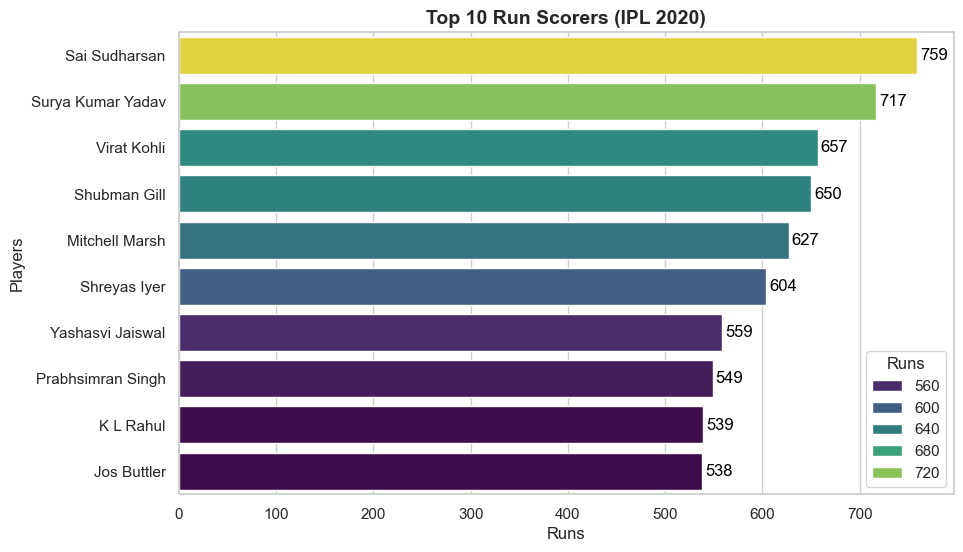

In [14]:
#TOP 10 RUN SCORES
ax = sns.barplot(x="Runs", y = "Player Name",data = top_runs, palette="viridis",hue='Runs')
for i, v in enumerate(top_runs.sort_values("Runs", ascending=False)["Runs"]):
    ax.text(v + 3, i, str(v), color="black", va="center")
plt.title("Top 10 Run Scorers (IPL 2020)")
plt.xlabel('Runs')
plt.ylabel('Players')

# Save the figure in .png format
plt.savefig('image1.png',bbox_inches = 'tight')

# Displays the plot
plt.show()

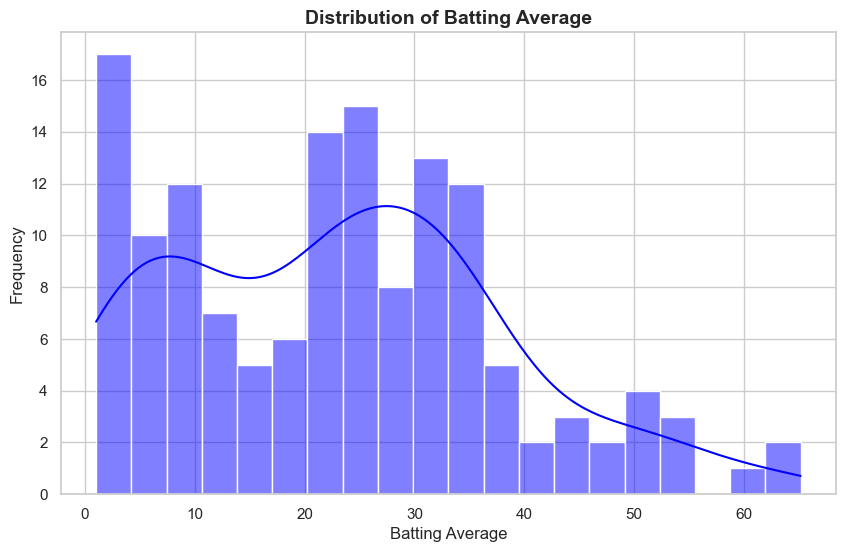

In [15]:
# Distribution of Batting Average
sns.histplot(df['AVG'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.savefig('image2.png', bbox_inches='tight')

plt.show()

In [16]:
# Most 50s player
most_50s = df.sort_values(by = '50s', ascending = False).head(10)
most_50s[['Player Name', 'Runs', '50s']]

,Player Name,Runs,50s
2,Virat Kohli,657,8
0,Sai Sudharsan,759,6
3,Shubman Gill,650,6
4,Mitchell Marsh,627,6
6,Yashasvi Jaiswal,559,6
5,Shreyas Iyer,604,6
1,Surya Kumar Yadav,717,5
9,Jos Buttler,538,5
10,Nicholas Pooran,524,5
13,Aiden Markram,445,5


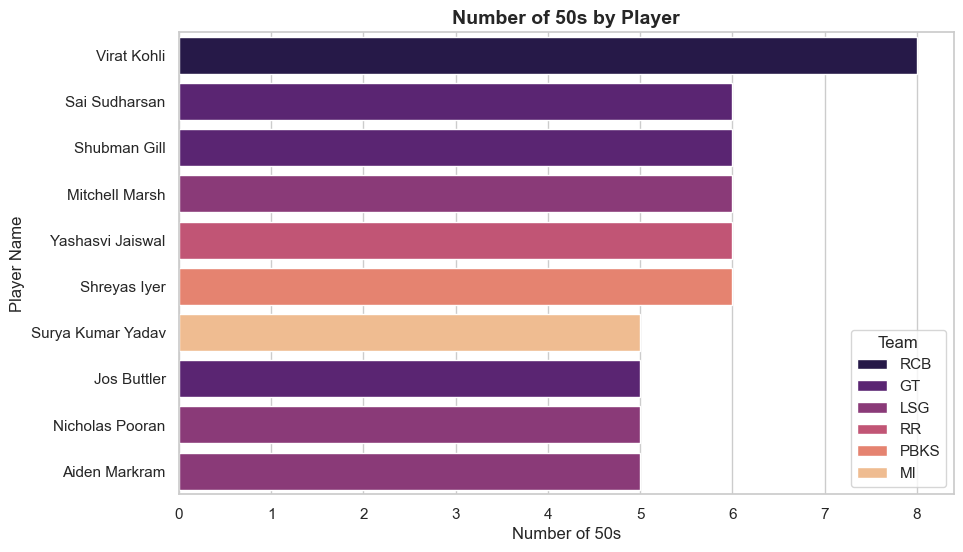

In [17]:
sns.barplot(x='50s',y='Player Name',data=most_50s,hue='Team',palette='magma')
plt.title("Number of 50s by Player")
plt.xlabel('Number of 50s')
plt.ylabel('Player Name')
plt.savefig('image3.png',bbox_inches = 'tight')

plt.show()

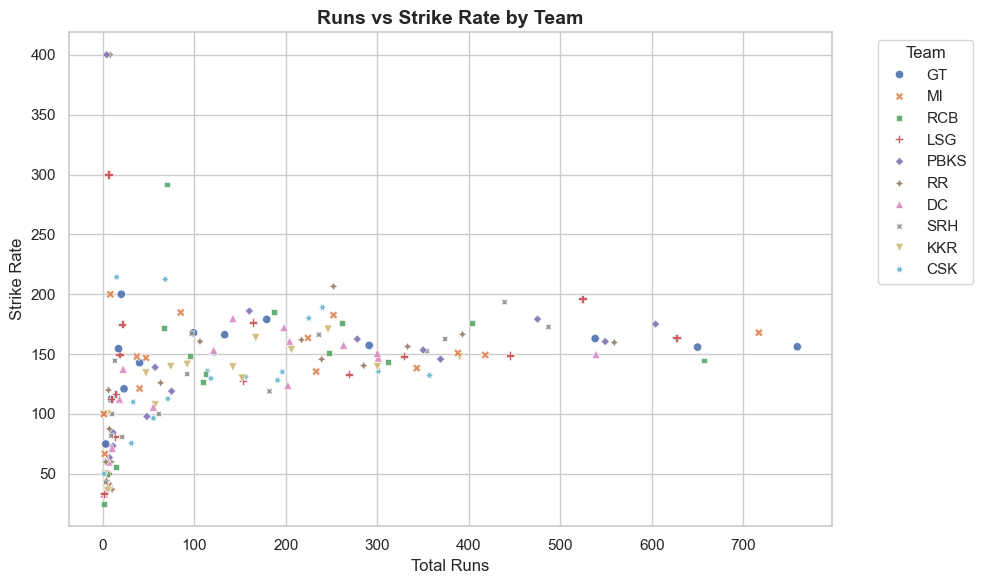

In [18]:
# Comparison of Runs with Strike Rate
sns.scatterplot(data=df, x='Runs', y='SR', hue='Team', style='Team', alpha=0.9)
plt.title('Runs vs Strike Rate by Team')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('image4.png', bbox_inches='tight')

plt.show()

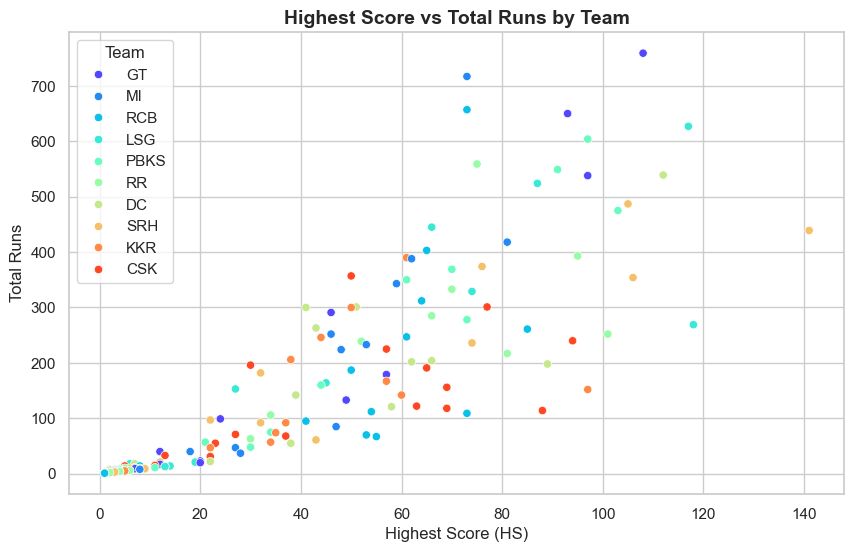

In [19]:
# High Score Vs Runs
sns.scatterplot(x='HS', y ='Runs', data =df ,hue='Team',palette ='rainbow')
plt.title('Highest Score vs Total Runs by Team', fontsize=14, fontweight='bold')
plt.xlabel('Highest Score (HS)')
plt.ylabel('Total Runs')
plt.savefig('image5.png',bbox_inches = 'tight')

plt.show()

In [20]:
# Creating a new column for anlyzing performance on weighted combination
# Fantasy Players
df['Impact_Score'] = (
    df['Runs'] *0.5 +
    df['SR']*0.3 +
    df['50s'] *0.1 +
    df['100s']*0.25)

In [21]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s,Impact_Score
0,Sai Sudharsan,GT,759,15,15,1,108,54.21,486,156.17,1,6,88,21,427.201
1,Surya Kumar Yadav,MI,717,16,16,5,73,65.18,427,167.91,0,5,69,38,409.373
2,Virat Kohli,RCB,657,15,15,3,73,54.75,454,144.71,0,8,66,19,372.713
3,Shubman Gill,GT,650,15,15,2,93,50.00,417,155.87,0,6,62,24,372.361
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37,363.460


In [22]:
# Top 10 Fantasy Players 
top_player = df.sort_values(by='Impact_Score',ascending = False).head(10)
top_player[["Player Name", "Team", "Runs", "SR", "50s", "100s", "Impact_Score"]]

,Player Name,Team,Runs,SR,50s,100s,Impact_Score
0,Sai Sudharsan,GT,759,156.17,6,1,427.201
1,Surya Kumar Yadav,MI,717,167.91,5,0,409.373
2,Virat Kohli,RCB,657,144.71,8,0,372.713
3,Shubman Gill,GT,650,155.87,6,0,372.361
4,Mitchell Marsh,LSG,627,163.70,6,1,363.460
5,Shreyas Iyer,PBKS,604,175.07,6,0,355.121
6,Yashasvi Jaiswal,RR,559,159.71,6,0,328.013
7,Prabhsimran Singh,PBKS,549,160.52,4,0,323.056
10,Nicholas Pooran,LSG,524,196.25,5,0,321.375
9,Jos Buttler,GT,538,163.03,5,0,318.409


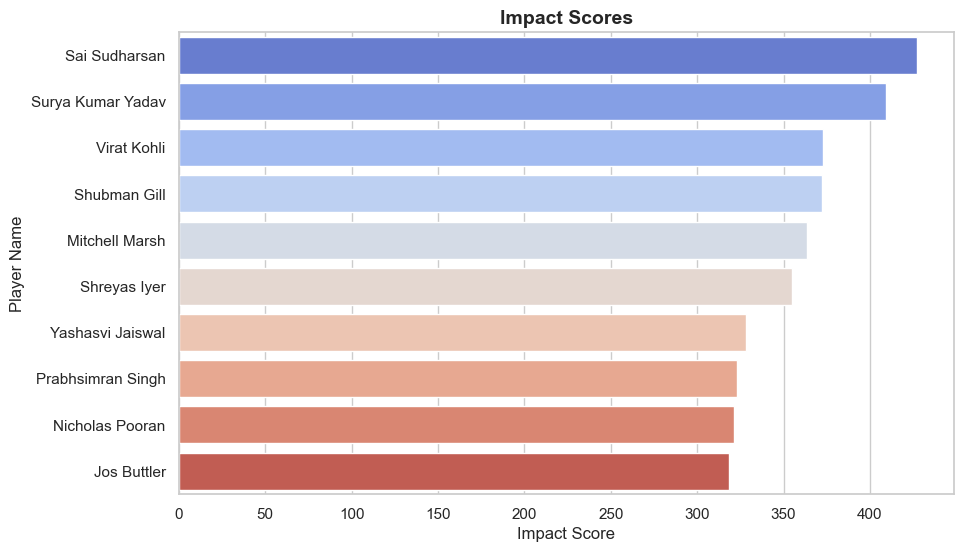

In [23]:
# Players based on Impact_Scores
sns.barplot(x='Impact_Score', y='Player Name',data = top_player,palette ='coolwarm',hue='Player Name')
plt.title('Impact Scores')
plt.xlabel('Impact Score')
plt.ylabel('Player Name')
plt.savefig('image6.png',bbox_inches = 'tight')

plt.show()

In [24]:
#  Most Six hitters
most_six = df.sort_values(by='6s',ascending =False).head(10)
most_six

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s,Impact_Score
10,Nicholas Pooran,LSG,524,14,14,2,87,43.67,267,196.25,0,5,45,40,321.375
5,Shreyas Iyer,PBKS,604,17,17,5,97,50.33,345,175.07,0,6,43,39,355.121
1,Surya Kumar Yadav,MI,717,16,16,5,73,65.18,427,167.91,0,5,69,38,409.373
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37,363.460
7,Prabhsimran Singh,PBKS,549,17,17,0,91,32.29,342,160.52,0,4,56,30,323.056
6,Yashasvi Jaiswal,RR,559,14,14,1,75,43.00,350,159.71,0,6,60,28,328.013
14,Abhishek Sharma,SRH,439,14,13,0,141,33.77,227,193.39,1,2,46,28,277.967
17,Riyan Parag,RR,393,14,14,2,95,32.75,236,166.52,0,1,27,27,246.556
11,Heinrich Klaasen,SRH,487,13,13,2,105,44.27,282,172.69,1,1,42,25,295.657
12,Priyansh Arya,PBKS,475,17,17,0,103,27.94,265,179.24,1,2,55,25,291.722


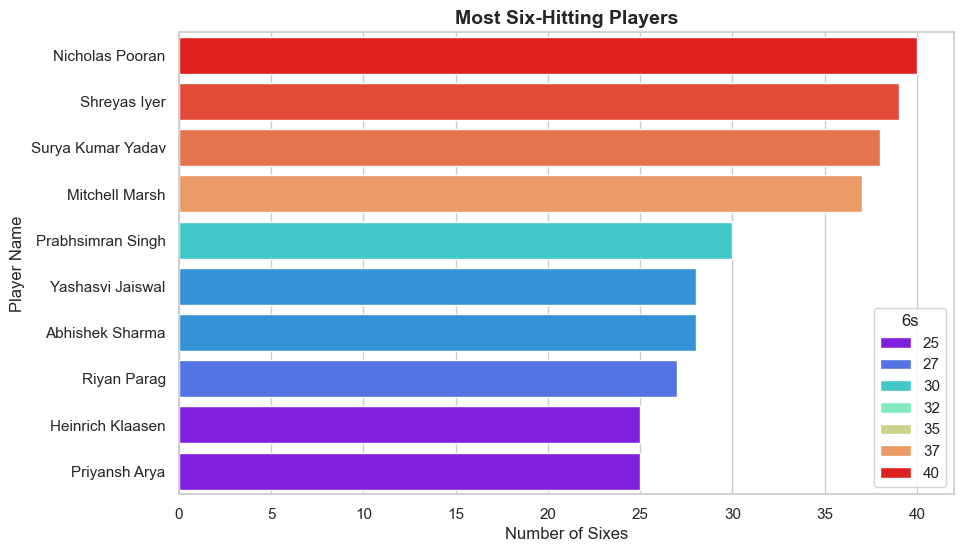

In [25]:
sns.barplot(x='6s', y = 'Player Name', data = most_six, hue= '6s',palette = 'rainbow')
plt.title('Most Six-Hitting Players')
plt.xlabel('Number of Sixes')
plt.ylabel('Player Name')
plt.savefig('image7.png',bbox_inches = 'tight')

plt.show()

In [26]:
# Teams hits most SIX
most_sixes = df.groupby('Team',as_index= False)['6s'].sum().sort_values(by='6s',ascending=False)
most_sixes

,Team,6s
6,PBKS,173
4,LSG,152
8,RR,146
5,MI,142
7,RCB,125
2,GT,124
9,SRH,120
1,DC,109
0,CSK,102
3,KKR,101


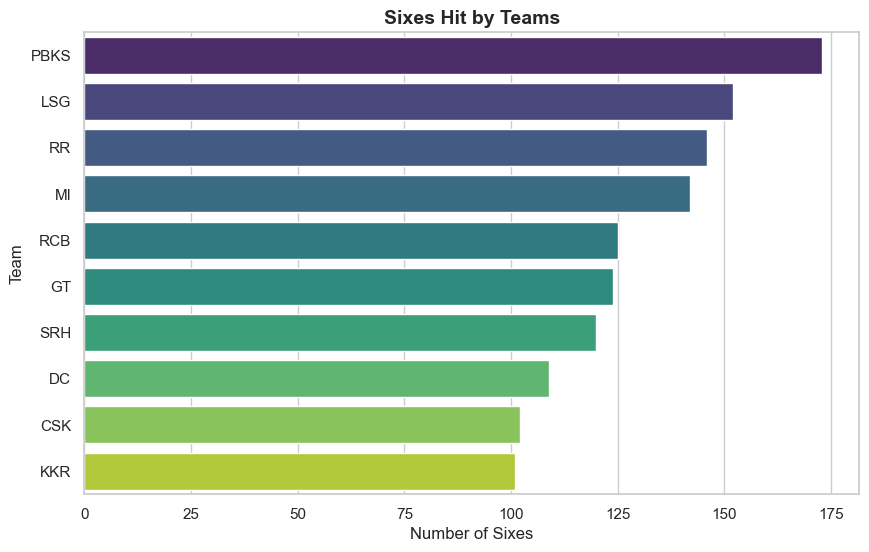

In [27]:
sns.barplot(y='Team' , x='6s', data = most_sixes, hue='Team',palette = 'viridis')
plt.title('Sixes Hit by Teams')
plt.xlabel('Number of Sixes')
plt.ylabel('Team')
plt.savefig('image8.png',bbox_inches = 'tight')

plt.show()

In [28]:
# WInning Team Score Analysis
winning_team = df[df['Team'] == 'RCB'].sort_values('Runs',ascending =False)

# main_players are those player who has scored more than 150 runs
main_players = winning_team[winning_team['Runs'] >=150][['Player Name', 'Runs']]
main_players

,Player Name,Runs
2,Virat Kohli,657
16,Phil Salt,403
28,Rajat Patidar,312
38,Jitesh Sharma,261
41,Devdutt Padikkal,247
56,Tim David,187


In [29]:
# Players who has scored less than 150 runs are categorized as Others 
other_players = winning_team[winning_team['Runs']<150]['Runs'].sum()
other_rows = pd.DataFrame({'Player Name': ['Others'], 'Runs': [other_players]})
other_rows

,Player Name,Runs
0,Others,472


In [30]:
# Here is the respective Players 
top_batsman = pd.concat([main_players, other_rows], ignore_index=True)
top_batsman

,Player Name,Runs
0,Virat Kohli,657
1,Phil Salt,403
2,Rajat Patidar,312
3,Jitesh Sharma,261
4,Devdutt Padikkal,247
5,Tim David,187
6,Others,472


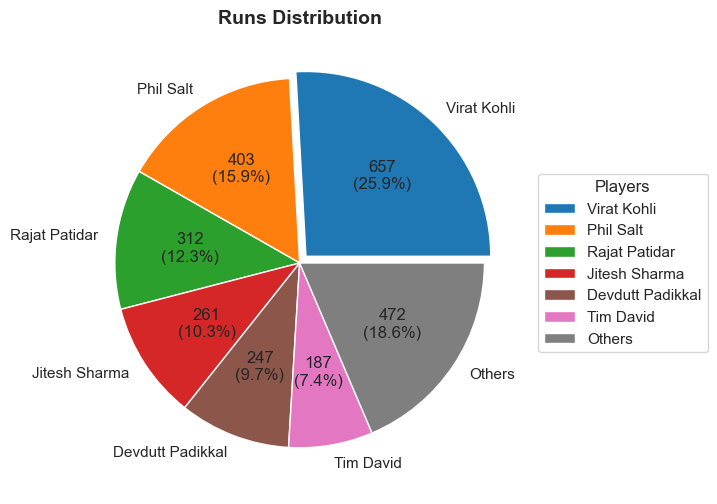

In [31]:
# Extracted Colors 
cmap = plt.get_cmap('tab10') 
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

# Custom autopct function
def show_value_and_percent(pct, all_vals):
    absolute = int(round(pct/100.*np.sum(all_vals)))
    return f"{absolute}\n({pct:.1f}%)"

# Displaying PieChart along with Totol Runs and Percentage Runs Contribution
plt.pie(
    top_batsman['Runs'],
    labels=top_batsman['Player Name'],
    colors=colors,
    autopct=lambda pct: show_value_and_percent(pct, top_batsman['Runs']),
    startangle=0,
    explode=[0.05 if x == top_batsman['Runs'].max() else 0 for x in top_batsman['Runs']]  # Highlight top scorer
)
plt.legend(top_batsman['Player Name'], title='Players', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Runs Distribution')
plt.savefig('image9.png',bbox_inches = 'tight')

plt.show()

## Bowlers Analysis


In [32]:
# Reading the Bowlers Dataset
df1 = pd.read_csv('IPL2025Bowlers.csv')
# Sets Index starts from 1 instead of 0
df1.index = range(1,len(df1) + 1)
# First 10 rows
df1.head(10)

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
1,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
2,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0
3,Josh Hazlewood,RCB,22,12,12,44.0,386,33/4,17.54,8.77,12.00,1,0
4,Trent Boult,MI,22,16,16,57.4,517,26/4,23.50,8.96,15.72,1,0
5,Arshdeep Singh,PBKS,21,17,16,58.2,518,16/3,24.66,8.88,16.66,0,0
6,Sai Kishore,GT,19,15,15,42.3,393,30/3,20.68,9.24,13.42,0,0
7,Jasprit Bumrah,MI,18,12,12,47.2,316,22/4,17.55,6.67,15.77,1,0
8,Varun Chakaravarthy,KKR,17,13,13,50.0,383,22/3,22.52,7.66,17.64,0,0
9,Krunal Pandya,RCB,17,15,15,46.0,379,45/4,22.29,8.23,16.23,1,0
10,Bhuvneshwar Kumar,RCB,17,14,14,52.0,483,33/3,28.41,9.28,18.35,0,0


In [33]:
# Checking Datatype
df1.dtypes

Player Name     object
Team            object
WKT              int64
MAT              int64
INN              int64
OVR            float64
RUNS             int64
BBI             object
AVG            float64
ECO            float64
SR             float64
4W               int64
5W               int64
dtype: object

In [34]:
# Top 10 wicket takers
top_wkt = df1.sort_values(by='WKT',ascending =False).head(10)
top_wkt[['Player Name','Team','MAT','OVR', 'ECO']]

,Player Name,Team,MAT,OVR,ECO
1,Prasidh Krishna,GT,15,59.0,8.27
2,Noor Ahmad,CSK,14,50.0,8.16
3,Josh Hazlewood,RCB,12,44.0,8.77
4,Trent Boult,MI,16,57.4,8.96
5,Arshdeep Singh,PBKS,17,58.2,8.88
6,Sai Kishore,GT,15,42.3,9.24
7,Jasprit Bumrah,MI,12,47.2,6.67
8,Varun Chakaravarthy,KKR,13,50.0,7.66
9,Krunal Pandya,RCB,15,46.0,8.23
10,Bhuvneshwar Kumar,RCB,14,52.0,9.28


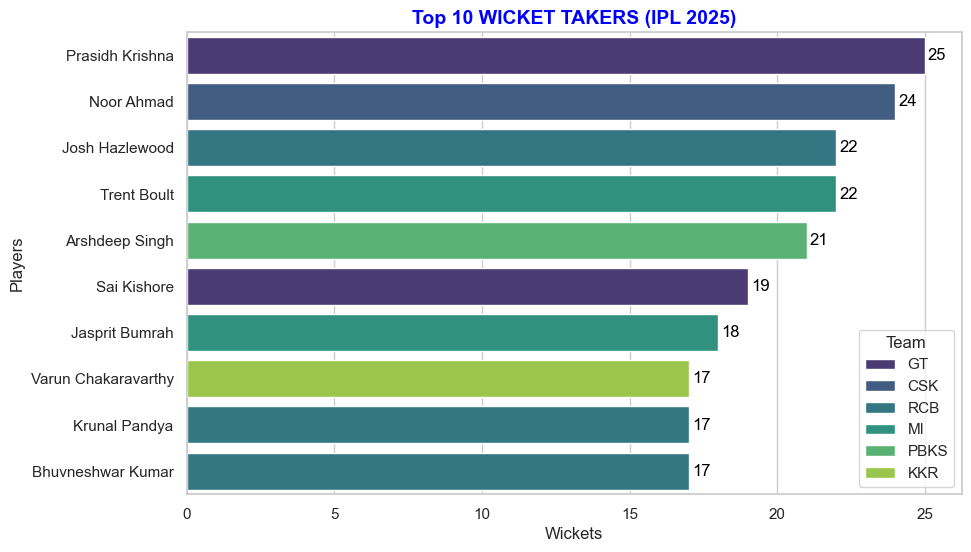

In [35]:
# Plotting Top 10 Wicket takers with their name
ax = sns.barplot(x="WKT", y = "Player Name",data = top_wkt, palette="viridis",hue='Team')
for i, v in enumerate(top_wkt.sort_values("WKT", ascending=False)["WKT"]):
    ax.text(v + 0.1, i, str(v), color="black", va="center")
plt.title("Top 10 WICKET TAKERS (IPL 2025)", color='blue')
plt.xlabel('Wickets')
plt.ylabel('Players')
plt.savefig('image10.png',bbox_inches = 'tight')

plt.show()

In [36]:
# Checking Players with their ECO (Economy)
economists = df1[df1['OVR'] > 30].sort_values('ECO').head(10)
economists

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
7,Jasprit Bumrah,MI,18,12,12,47.2,316,22/4,17.55,6.67,15.77,1,0
17,Kuldeep Yadav,DC,15,14,13,51.0,361,22/3,24.06,7.07,20.40,0,0
8,Varun Chakaravarthy,KKR,17,13,13,50.0,383,22/3,22.52,7.66,17.64,0,0
28,Sunil Narine,KKR,12,12,12,45.0,351,13/3,29.25,7.80,22.50,0,0
37,Mitchell Santner,MI,10,13,13,39.3,313,3-Nov,31.30,7.92,23.70,0,0
2,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0
9,Krunal Pandya,RCB,17,15,15,46.0,379,45/4,22.29,8.23,16.23,1,0
20,Digvesh Singh,LSG,14,13,13,52.0,429,30/2,30.64,8.25,22.28,0,0
1,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
58,Axar Patel,DC,5,12,11,34.0,288,19/2,57.60,8.47,40.80,0,0


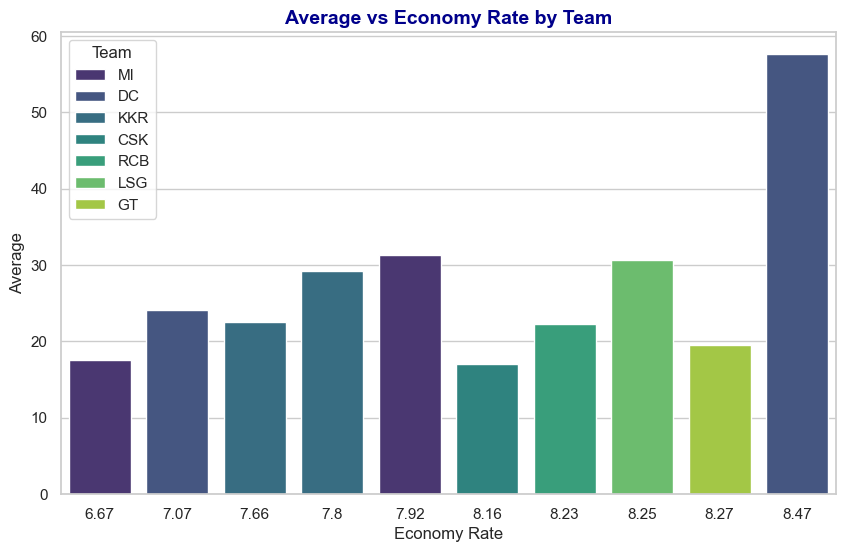

In [37]:
# Plotting Bargraph with Average vs Economy Rate
sns.barplot(y='AVG', x='ECO', data=economists, hue='Team', palette='viridis')
plt.title('Average vs Economy Rate by Team', color='darkblue')
plt.xlabel('Economy Rate')
plt.ylabel('Average')
plt.savefig('image11.png',bbox_inches = 'tight')

plt.show()

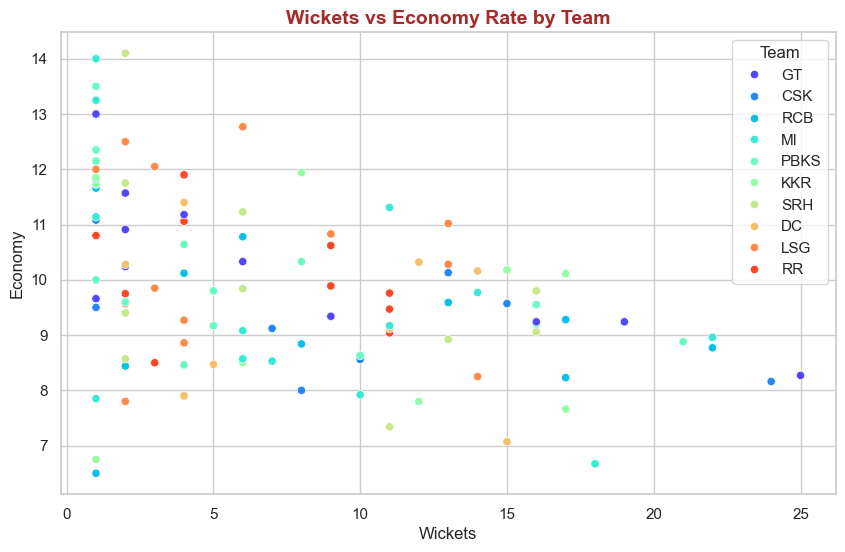

In [38]:
# Wickets vs Economy Rate distribution
sns.scatterplot(x='WKT', y='ECO', data = df1,hue='Team',palette = 'rainbow')
plt.title('Wickets vs Economy Rate by Team',color = 'brown')
plt.xlabel('Wickets')
plt.ylabel('Economy')
plt.savefig('image12.png',bbox_inches = 'tight')

plt.show()

In [39]:
# Player with 4 Wicket in a match
four_wkt_players = df1[df1['4W']>0]
four_wkt_players[['Player Name','Team', 'WKT']]

,Player Name,Team,WKT
1,Prasidh Krishna,GT,25
2,Noor Ahmad,CSK,24
3,Josh Hazlewood,RCB,22
4,Trent Boult,MI,22
7,Jasprit Bumrah,MI,18
9,Krunal Pandya,RCB,17
14,Mohammed Siraj,GT,16
15,Yuzvendra Chahal,PBKS,16
16,Harshal Patel,SRH,16
27,Shardul Thakur,LSG,13


In [40]:
# Player with 5 Wicket in a match
five_wkt_players = df1[df1['5W']>0]
five_wkt_players[['Player Name','Team', 'WKT']]


,Player Name,Team,WKT
21,Hardik Pandya,MI,14
22,Mitchell Starc,DC,14


In [41]:
# Winning Team Bolwers analysis sort by higest wickests
bowlers = df1[df1['Team'] == 'RCB']
bowlers

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
3,Josh Hazlewood,RCB,22,12,12,44.0,386,33/4,17.54,8.77,12.00,1,0
9,Krunal Pandya,RCB,17,15,15,46.0,379,45/4,22.29,8.23,16.23,1,0
10,Bhuvneshwar Kumar,RCB,17,14,14,52.0,483,33/3,28.41,9.28,18.35,0,0
24,Yash Dayal,RCB,13,15,15,49.0,470,18/2,36.15,9.59,22.61,0,0
45,Suyash Sharma,RCB,8,14,14,50.0,442,17/3,55.25,8.84,37.50,0,0
55,Romario Shepherd,RCB,6,8,7,14.0,151,14/2,25.16,10.78,14.00,0,0
66,Lungisani Ngidi,RCB,4,2,2,8.0,81,30/3,20.25,10.12,12.00,0,0
76,Liam Livingstone,RCB,2,10,5,9.0,76,28/2,38.00,8.44,27.00,0,0
89,Nuwan Thushara,RCB,1,1,1,4.0,26,26/1,26.00,6.50,24.00,0,0
98,Rasikh Dar,RCB,1,2,2,6.0,70,35/1,70.00,11.66,36.00,0,0


In [42]:
# Wickets distribution 
main_bowlers = bowlers[bowlers['WKT'] > 5][['Player Name','WKT']]
main_bowlers 

other_bowlers_wkt = bowlers[bowlers['WKT'] < 5]['WKT'].sum()


others = pd.DataFrame({'Player Name' : 'Others' , 'WKT' : [other_bowlers_wkt]})

top_bowlers = pd.concat([main_bowlers,others])
top_bowlers

,Player Name,WKT
3,Josh Hazlewood,22
9,Krunal Pandya,17
10,Bhuvneshwar Kumar,17
24,Yash Dayal,13
45,Suyash Sharma,8
55,Romario Shepherd,6
0,Others,8


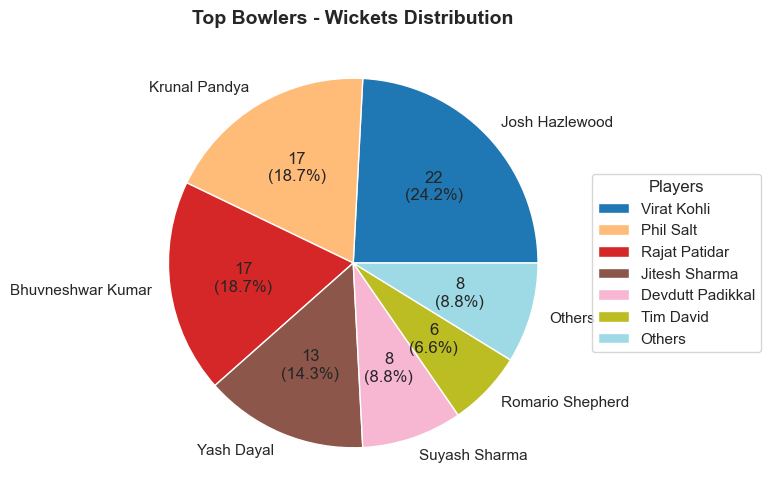

In [43]:
# Extracted Colors 
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(top_bowlers))]

# Custom autopct function
def show_value_and_percent(pct, all_vals):
    absolute = int(round(pct / 100. * np.sum(all_vals)))
    return f"{absolute}\n({pct:.1f}%)"

# Plot pie chart
plt.pie(
    top_bowlers['WKT'],
    labels=top_bowlers['Player Name'],
    colors=colors,
    autopct=lambda pct: show_value_and_percent(pct, top_bowlers['WKT'])
)

plt.title("Top Bowlers - Wickets Distribution",fontsize=14,fontweight='bold')
plt.legend(top_batsman['Player Name'], title='Players', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig('image13.png',bbox_inches = 'tight')

plt.show()